In [65]:
import pandas as pd
import numpy as np
import re

# for Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#For NLP tasks
import nltk
import spacy
from nltk.corpus import stopwords

import tensorflow as tf
# converting Text into sequences of numbers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, GlobalAveragePooling1D

#For measures
from sklearn.metrics import classification_report

In [46]:
data = pd.read_csv("/content/bbc-text.csv")
data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [47]:
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Text Preprocessing**

*   Lowercasing
*   Remove chars(Clean noise (punctuation, numbers)
*   Tokenize(Split into words)
*   Remove stopwords(Drop common/meaningless words)
*   Stem/Lemmatize(Reduce to root form)
*   Filter short words(Drop too short/uninformative tokens)
*   Tokenizer + pad (For deep learning input)

In [48]:
# Delete tokens
nltk.download('punkt') # for splitting sentences for words
nltk.download('punkt_tab')

cleaned_data = [] # for store data after cleaning
for text in data['text']:
  tokens = nltk.word_tokenize(text.lower())
  filtered = [token for token in tokens if token not in STOPWORDS]
  cleaned_data.append(filtered)

print(cleaned_data[:5]) # Print the first 5 cleaned text entries to check

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high-definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', '.', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', '.', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', '.', 'one', 'talked-about', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', '(', 'dvr', 'pvr', ')', '.', 'set-top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky+', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', '.', 'essentially', 'technology', 'allows

In [49]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

data['clean_text'] = data['text'].apply(clean_text)


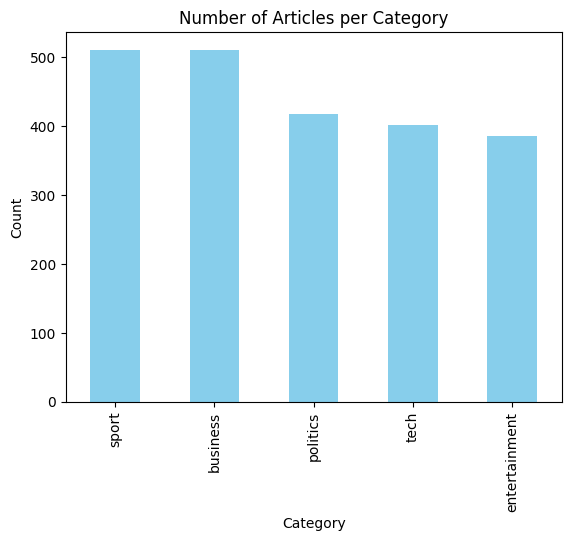

In [50]:
data['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


# **Tokenization & Pad Sequence**

In [51]:
vocab_size = 5000
max_length = 300

In [52]:
vocab_size = 5000
max_length = 300

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(data['clean_text'])
sequences = tokenizer.texts_to_sequences(data['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# **Encode Labels**

In [53]:
LabelEncoder = LabelEncoder()
data["category"] = LabelEncoder.fit_transform(data["category"])

# ***Splitting Data***

In [54]:
x = padded_sequences
y = data['category']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
print(data["category"][:10])  # encoded labels
print(LabelEncoder.classes_)

0    4
1    0
2    3
3    3
4    1
5    2
6    2
7    3
8    3
9    1
Name: category, dtype: int64
['business' 'entertainment' 'politics' 'sport' 'tech']


# ***Model building***

*   Layers
*   Compiling the model




In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [68]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ***Training***

In [72]:
hitory = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9613 - loss: 0.1765 - val_accuracy: 0.8112 - val_loss: 0.8252
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9701 - loss: 0.1519 - val_accuracy: 0.8135 - val_loss: 0.8360
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9743 - loss: 0.1242 - val_accuracy: 0.8135 - val_loss: 0.8541
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9732 - loss: 0.1460 - val_accuracy: 0.8112 - val_loss: 0.8706
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9730 - loss: 0.1175 - val_accuracy: 0.8202 - val_loss: 0.8765
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9705 - loss: 0.1347 - val_accuracy: 0.8202 - val_loss: 0.8739
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9751 - loss: 0.1252 - val_accuracy: 0.8180 - val_loss: 0.8662
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9757 - loss: 0.1183 - val_accuracy: 0.8202 - v

In [73]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test),
          batch_size=32, callbacks=[early_stop])

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8624 - loss: 0.3798 - val_accuracy: 0.7753 - val_loss: 0.9965
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9500 - loss: 0.2207 - val_accuracy: 0.7685 - val_loss: 1.0892
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9515 - loss: 0.1705 - val_accuracy: 0.7753 - val_loss: 1.0700
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9284 - loss: 0.2422 - val_accuracy: 0.7775 - val_loss: 1.1037


# ***Evaluation***

In [61]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7669 - loss: 1.1497
Test Accuracy: 0.77


In [62]:
#Classification Report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       101
           1       0.56      0.88      0.68        81
           2       0.84      0.61      0.71        83
           3       0.95      0.81      0.87        98
           4       0.86      0.80      0.83        82

    accuracy                           0.77       445
   macro avg       0.80      0.77      0.77       445
weighted avg       0.80      0.77      0.77       445



# ***Prediction***

In [63]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [64]:
model.save("bbc_text_classification_model.h5")